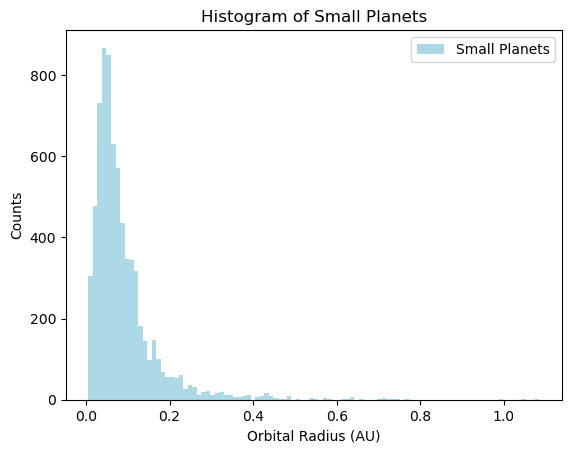

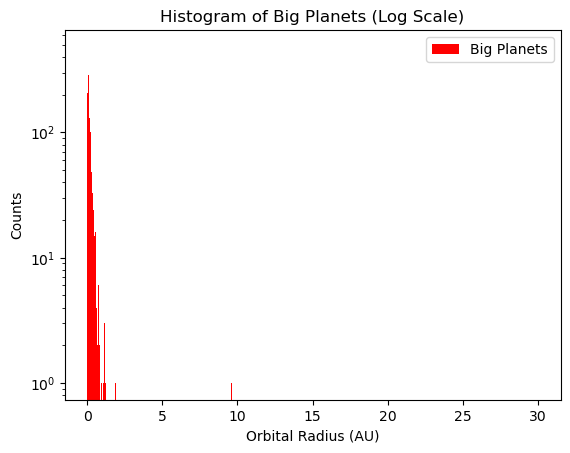

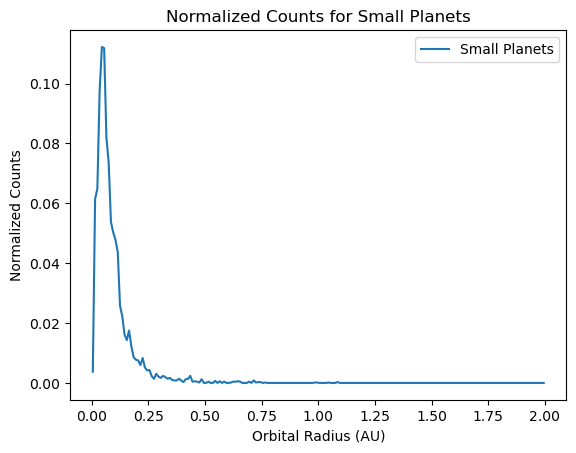

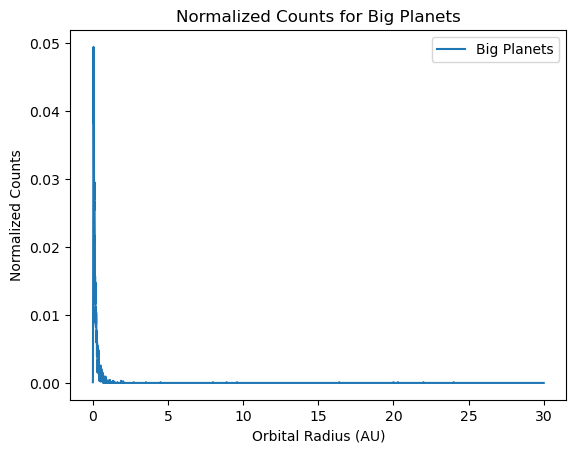

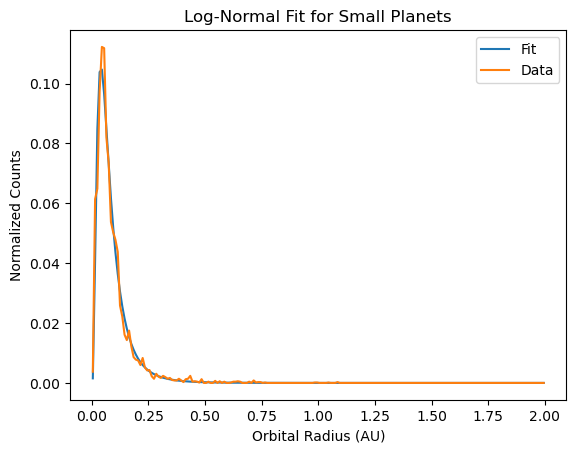

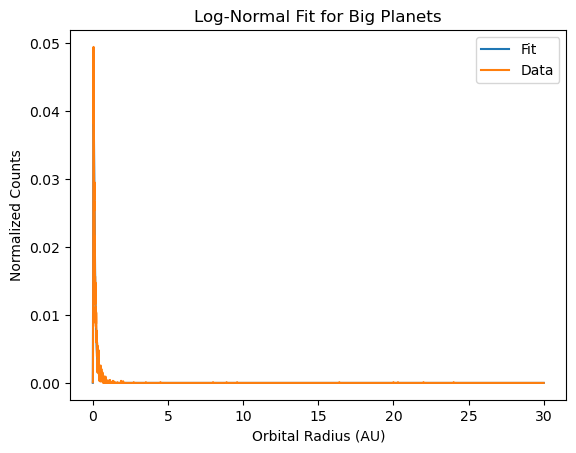

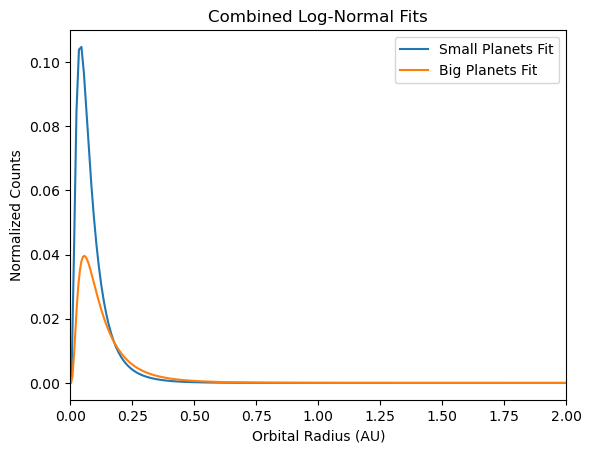

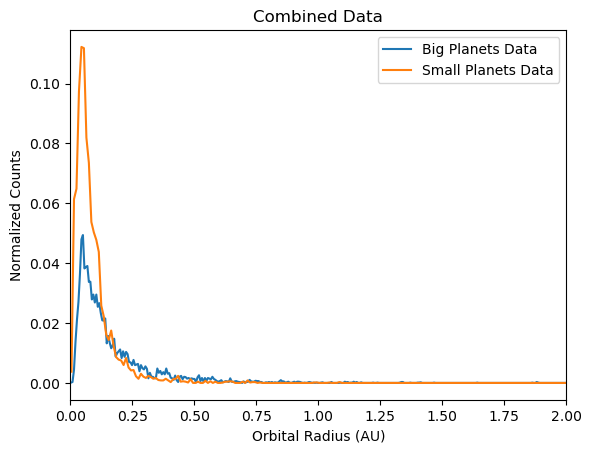

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = pd.read_csv('final_proj_data.csv', on_bad_lines='skip')

planets = pd.DataFrame(data)

planets = planets.dropna(subset=['pl_rade', 'pl_orbsmax'])

#print(planets)

planetsbystar = planets.groupby('hostname')

#print(planetsbystar)

smallplanets = []
bigplanets = []

for hostname, group in planetsbystar:
    small = group[group['pl_rade'] < 2]['pl_orbsmax'].tolist()
    big = group[group['pl_rade'] >= 2]['pl_orbsmax'].tolist()

    smallplanets.extend(small)
    bigplanets.extend(big)

smallplanets = np.array(smallplanets)
bigplanets = np.array(bigplanets)

#print("Small planets", smallplanets)
#print("Big planets:", bigplanets)

#print(bigplanets)
#print(smallplanets)

plt.figure()
plt.hist(smallplanets, color='lightblue', bins=100)
plt.title("Histogram of Small Planets")
plt.xlabel("Orbital Radius (AU)")
plt.ylabel("Counts")
plt.legend(["Small Planets"])

#Filter --We will consider planets below 30AU to compare with our solar system

plt.figure()
plt.hist(bigplanets, color='red', bins=5000, range=[0,30])
plt.yscale('log')
plt.title("Histogram of Big Planets (Log Scale)")
plt.xlabel("Orbital Radius (AU)")
plt.ylabel("Counts")
plt.legend(["Big Planets"])
plt.show()


def histogram(data, b, limits):
    counts, bin_edges = np.histogram(data, bins=b, range=limits)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    return counts, bin_centers

csmall, bcsmall = histogram(smallplanets, 200, (0,2))

cbig, bcbig = histogram(bigplanets, 5000, (0,30))

csmall = np.array(csmall)
cbig = np.array(cbig)

#Normalizing the counts

csmall = csmall / np.sum(csmall)
cbig = cbig / np.sum(cbig)

#Graphing the counts for small planets

plt.plot(bcsmall, csmall)
plt.title("Normalized Counts for Small Planets")
plt.xlabel("Orbital Radius (AU)")
plt.ylabel("Normalized Counts")
plt.legend(["Small Planets"])
plt.show()

#Graphing the counts for big planets

plt.plot(bcbig, cbig)
plt.title("Normalized Counts for Big Planets")
plt.xlabel("Orbital Radius (AU)")
plt.ylabel("Normalized Counts")
plt.legend(["Big Planets"])
plt.show()

def logau(r, A, s, m):
    return A/(r*s*np.sqrt(2*np.pi))*np.exp(-((np.log(r)-m)**2)/(2*s**2))

guess_small = [max(csmall), np.std(np.log(smallplanets)), np.mean(np.log(smallplanets))]
guess_big = [max(cbig), np.std(np.log(bigplanets)), np.mean(np.log(bigplanets))]


popt1, pcov1=curve_fit(logau,bcsmall,csmall,guess_small, maxfev=10000)
popt2, pcov2=curve_fit(logau,bcbig,cbig,guess_big, maxfev=10000)

#First result

plt.plot(bcsmall, logau(bcsmall, *popt1))
plt.plot(bcsmall, csmall)
plt.title("Log-Normal Fit for Small Planets")
plt.xlabel("Orbital Radius (AU)")
plt.ylabel("Normalized Counts")
plt.legend(["Fit", "Data"])
plt.show()

#Second result

plt.plot(bcbig, logau(bcbig, *popt2))
plt.plot(bcbig, cbig)
plt.title("Log-Normal Fit for Big Planets")
plt.xlabel("Orbital Radius (AU)")
plt.ylabel("Normalized Counts")
plt.legend(["Fit", "Data"])
plt.show()


#Combined results


plt.plot(bcsmall, logau(bcsmall, *popt1))
plt.plot(bcbig, logau(bcbig, *popt2))
plt.xlim([0, 2])
plt.title("Combined Log-Normal Fits")
plt.xlabel("Orbital Radius (AU)")
plt.ylabel("Normalized Counts")
plt.legend(["Small Planets Fit", "Big Planets Fit"])
plt.show()

plt.plot(bcbig, cbig)
plt.plot(bcsmall, csmall)
plt.xlim([0, 2])
plt.title("Combined Data")
plt.xlabel("Orbital Radius (AU)")
plt.ylabel("Normalized Counts")
plt.legend(["Big Planets Data", "Small Planets Data"])
plt.show()